In [1]:
import torch
import matplotlib.pyplot as plt

X shape: torch.Size([100, 1])
y shape: torch.Size([100, 1])


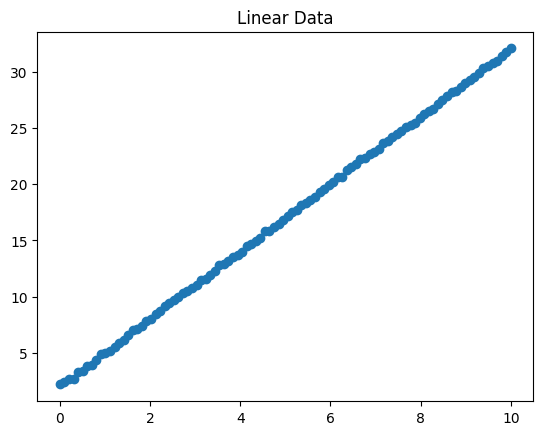

In [2]:
# Generate linear data: y = 3x + 2 + noise
torch.manual_seed(42)
X = torch.linspace(0, 10, 100).unsqueeze(1)  # (100, 1)
y = 3 * X + 2 + 0.1 * torch.randn_like(X)   # (100, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

# Optional: plot to visualize
plt.scatter(X, y)
plt.title("Linear Data")
plt.show()

## 1. Initialize parameters

In [3]:
# Parameters: w and b are leaf tensors with requires_grad
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print("Initial w:", w)
print("Initial b:", b)

Initial w: tensor([-0.5672], requires_grad=True)
Initial b: tensor([-0.5706], requires_grad=True)


## 2. Single forward pass + loss

In [4]:
def forward(X, w, b):
    y_pred = w * X + b
    loss = ((y_pred - y) ** 2).mean()
    return y_pred, loss

y_pred, loss = forward(X, w, b)
print("Prediction shape:", y_pred.shape)
print("Loss:", loss.item())

Prediction shape: torch.Size([100, 1])
Loss: 524.8272094726562


## 3. Single backward + manual update step

In [5]:
# Forward
y_pred, loss = forward(X, w, b)
print("Loss before:", loss.item())

Loss before: 524.8272094726562


In [6]:
# Backward
loss.backward()
print("w.grad:", w.grad)
print("b.grad:", b.grad)

w.grad: tensor([-264.7693])
b.grad: tensor([-40.8251])


In [7]:
# MANUAL update (no optimizer yet!)
lr = 0.01
with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

In [8]:
# Zero gradients
w.grad.zero_()
b.grad.zero_()

tensor([0.])

In [9]:
print("Updated w:", w)
print("Updated b:", b)

Updated w: tensor([2.0805], requires_grad=True)
Updated b: tensor([-0.1624], requires_grad=True)


## 4. Full training loop

In [10]:
def train_manual(X, y, lr=0.01, steps=100):
    w = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    losses = []

    for step in range(steps):
        y_pred, loss = forward(X, w, b)
        loss.backward()

        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad

        w.grad.zero_()
        b.grad.zero_()

        losses.append(loss.item())

        if step % 20 == 0:
            print(f"Step {step:3d}, Loss: {loss.item():.4f}, w: {w.item():.2f}, b: {b.item():.2f}")

    return w, b, losses

# Train!
w_final, b_final, losses = train_manual(X, y, lr=0.01, steps=200)

print(f"\nFinal: w = {w_final.item():.2f} (true: 3.0), b = {b_final.item():.2f} (true: 2.0)")

Step   0, Loss: 95.9921, w: 2.73, b: 0.29
Step  20, Loss: 0.5755, w: 3.22, b: 0.52
Step  40, Loss: 0.4734, w: 3.20, b: 0.66
Step  60, Loss: 0.3897, w: 3.18, b: 0.79
Step  80, Loss: 0.3211, w: 3.17, b: 0.91
Step 100, Loss: 0.2649, w: 3.15, b: 1.01
Step 120, Loss: 0.2188, w: 3.14, b: 1.11
Step 140, Loss: 0.1810, w: 3.12, b: 1.19
Step 160, Loss: 0.1501, w: 3.11, b: 1.27
Step 180, Loss: 0.1247, w: 3.10, b: 1.34

Final: w = 3.09 (true: 3.0), b = 1.40 (true: 2.0)


## 5. Visualize results

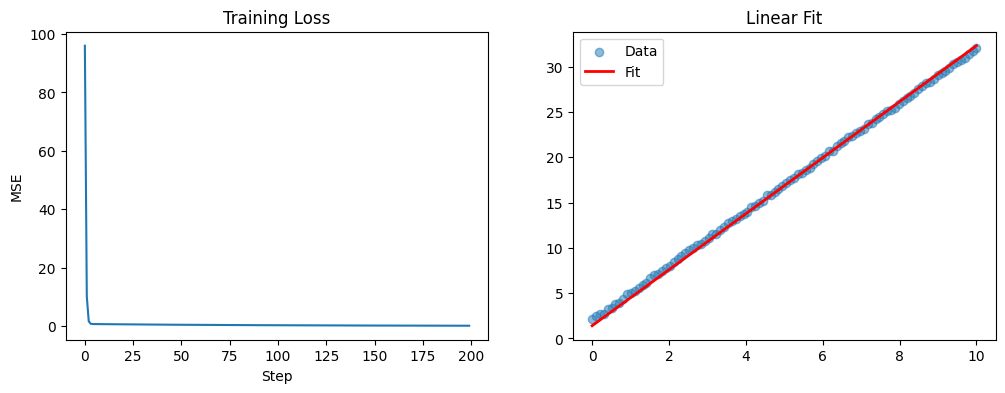

In [12]:
y_pred_final = w_final * X + b_final

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Step")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), alpha=0.5, label="Data")
plt.plot(X.numpy(), y_pred_final.detach().numpy(), "r-", linewidth=2, label="Fit")
plt.legend()
plt.title("Linear Fit")
plt.show()